<a href="https://colab.research.google.com/github/decci027/datascience_a2/blob/main/Deki_Tshomo9proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##context:
The dataset I used contains real-world weather data, including humidity, pressure, and temperature. This kind of information is essential not just for daily forecasts, but for understanding larger weather trends that impact agriculture, travel, safety, and even climate research. I chose this dataset because I’ve always been interested in checking the weather—it's part of my daily routine. That curiosity led me to wonder if there was a clear relationship between humidity, pressure, and temperature. Could those variables help explain why some days feel warmer or cooler than others? Through this project, I wanted to explore that question using a neural network and see if the data could reveal patterns that aren’t immediately obvious from casual observation.

I set out to explore whether humidity and pressure could be used to predict temperature using a multi-layer, non-linear neural network. By training the model on weather data consisting of humidity, pressure, and temperature values, and visualizing the results through several graphs, I was able to observe clear patterns that indicate a relationship between these environmental variables.

##sources used
the notes -- the code / chatgpt -- to explanation of certain terms in the code

these were to gain a better understanding of neural networks:
https://realpython.com/python-ai-neural-network/
https://www.geeksforgeeks.org/single-neuron-neural-network-python/
https://www.reddit.com/r/learnmachinelearning/comments/1dv22tw/how_to_build_a_simple_neural_network_from_scratch/


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/decci027/datascience_a2/refs/heads/main/weather.csv"
df = pd.read_csv(url)

# Drop missing values
df.dropna(inplace=True)

# Select only the relevant columns
X = df[['Humidity', 'Pressure']]
y = df['Temp']

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [ ]:
class TempRegressor(nn.Module):
    def __init__(self):
        super(TempRegressor, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.output(x)
        return x

# Initialize the model
model = TempRegressor()


In [ ]:
# Loss function for regression
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 404.7776
Epoch 20/100, Loss: 400.7734
Epoch 30/100, Loss: 396.1191
Epoch 40/100, Loss: 390.0444
Epoch 50/100, Loss: 381.8665
Epoch 60/100, Loss: 371.2480
Epoch 70/100, Loss: 358.2191
Epoch 80/100, Loss: 342.5884
Epoch 90/100, Loss: 324.1654
Epoch 100/100, Loss: 302.9057


In [ ]:
# Switch to evaluation mode
model.eval()
with torch.no_grad():
    test_preds = model(X_test)

# Calculate Mean Squared Error on test data
mse = criterion(test_preds, y_test)
print(f"Test MSE: {mse.item():.4f}")


Test MSE: 308.4371


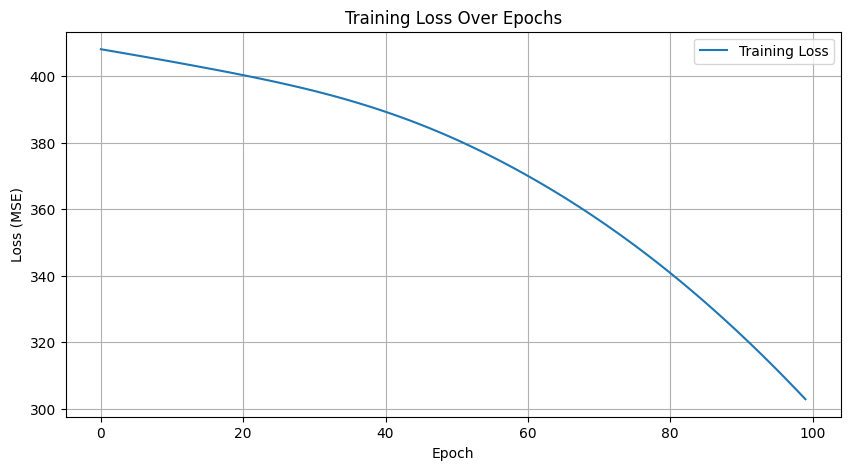

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

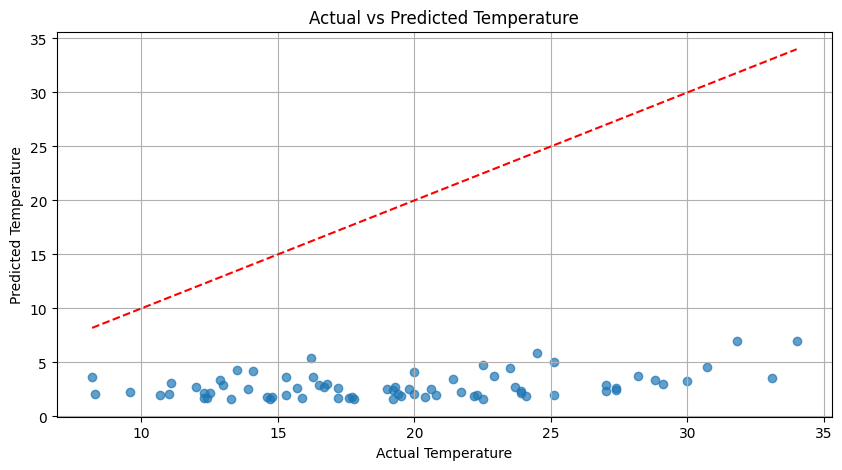

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test.numpy(), test_preds.numpy(), alpha=0.7)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line y=x
plt.grid(True)
plt.show()

##separate code here:

In [ ]:
weather = pd.read_csv("https://raw.githubusercontent.com/decci027/datascience_a2/refs/heads/main/weather.csv").dropna()
#drops all the non-numerical columns
weather.drop(columns=["WindGustDir", "WindGustSpeed", "RainTomorrow"],inplace=True)
weather.query("Temp > 24.2", inplace=True) #still a select group of players

In [ ]:
weather

,MinTemp,MaxTemp,Humidity,Pressure,Temp
1,14.0,26.9,36,1008.4,25.7
11,8.5,27.3,35,1019.9,26.0
12,10.1,27.9,29,1017.1,27.1
13,12.1,30.9,20,1013.1,30.7
14,10.1,31.2,16,1013.7,30.4
...,...,...,...,...,...
360,7.9,26.1,20,1014.2,25.9
361,9.0,30.7,15,1010.8,30.0
362,7.1,28.4,22,1016.9,28.2
364,12.5,26.9,39,1016.2,25.9


In [ ]:
predict = weather[["Humidity","Pressure","Temp"]]

In [ ]:
predict

,Humidity,Pressure,Temp
1,36,1008.4,25.7
11,35,1019.9,26.0
12,29,1017.1,27.1
13,20,1013.1,30.7
14,16,1013.7,30.4
...,...,...,...
360,20,1014.2,25.9
361,15,1010.8,30.0
362,22,1016.9,28.2
364,39,1016.2,25.9


In [ ]:
#convert to numpy array
w_matrix = predict.to_numpy()
#convert to a PyTorch tensor
w_tensor = torch.from_numpy(w_matrix)

In [ ]:
w_tensor

tensor([[  36.0000, 1008.4000,   25.7000],
        [  35.0000, 1019.9000,   26.0000],
        [  29.0000, 1017.1000,   27.1000],
        [  20.0000, 1013.1000,   30.7000],
        [  16.0000, 1013.7000,   30.4000],
        [  22.0000, 1012.8000,   30.7000],
        [  23.0000, 1009.8000,   29.8000],
        [  26.0000, 1013.0000,   28.6000],
        [  25.0000, 1013.3000,   31.2000],
        [  27.0000, 1013.7000,   32.0000],
        [  26.0000, 1006.5000,   32.8000],
        [  31.0000, 1018.6000,   27.3000],
        [  48.0000, 1016.5000,   25.1000],
        [  31.0000, 1014.8000,   26.7000],
        [  46.0000, 1009.5000,   25.2000],
        [  40.0000, 1006.3000,   25.1000],
        [  54.0000, 1016.1000,   24.5000],
        [  42.0000, 1011.4000,   26.3000],
        [  24.0000, 1008.5000,   28.6000],
        [  37.0000, 1012.5000,   25.0000],
        [  36.0000, 1010.2000,   29.1000],
        [  48.0000, 1008.3000,   28.2000],
        [  44.0000, 1013.4000,   27.4000],
        [  

In [ ]:
w_tensor.shape

torch.Size([88, 3])

In [ ]:
SxSt = torch.matmul(w_tensor,w_tensor.T) #this will actually mutlipy our matrices
SxSt,SxSt.shape

(tensor([[1018827.0500, 1030395.3600, 1027384.1100,  ..., 1026958.7000,
          1026805.7100, 1018880.3000],
         [1030395.3600, 1042097.0100, 1039059.8900,  ..., 1038639.5100,
          1038460.7800, 1030481.6800],
         [1027384.1100, 1039059.8900, 1036067.8200,  ..., 1035691.2100,
          1035409.9100, 1027609.3800],
         ...,
         [1026958.7000, 1038639.5100, 1035691.2100,  ..., 1035364.8500,
          1034962.1600, 1027348.0000],
         [1026805.7100, 1038460.7800, 1035409.9100,  ..., 1034962.1600,
          1034854.2500, 1026796.7800],
         [1018880.3000, 1030481.6800, 1027609.3800,  ..., 1027348.0000,
          1026796.7800, 1019471.6000]], dtype=torch.float64),
 torch.Size([88, 88]))

In [ ]:
linear = torch.nn.Linear(in_features=2, # in_features: must match column number of input
                         out_features=1,# out_features: column number of output
                         dtype=torch.float64) #specifies the data type

X = w_tensor[:,[1,2]] #use 3PA and FT% to predict
y_pred = linear(X) #the actual matrix multiplication
print(f"Input shape: {X.shape}\n")
print(f"Output:\n{y_pred}\n\nOutput shape: {y_pred.shape}")


Input shape: torch.Size([88, 2])

Output:
tensor([[102.9472],
        [104.1260],
        [103.4819],
        [101.9444],
        [102.1020],
        [101.9113],
        [101.8539],
        [102.5725],
        [101.8143],
        [101.6150],
        [100.5763],
        [103.5867],
        [104.0244],
        [103.3497],
        [103.2208],
        [102.8978],
        [104.1628],
        [103.0959],
        [102.0755],
        [103.6131],
        [102.1111],
        [102.1752],
        [102.9820],
        [102.1877],
        [101.0585],
        [101.7640],
        [101.4439],
        [100.5758],
        [102.5019],
        [100.4968],
        [101.3642],
        [102.7993],
        [103.1059],
        [101.5099],
        [100.0589],
        [ 99.8245],
        [100.3616],
        [101.1872],
        [103.8359],
        [104.2208],
        [102.5976],
        [101.5468],
        [101.3968],
        [101.6231],
        [101.2802],
        [103.2505],
        [103.2252],
        [102.3983]

In [ ]:

X = w_tensor[:,2].unsqueeze(dim=1) #use FT% as a predictor
y = w_tensor[:,0].unsqueeze(dim=1) #FG% is the estimand, the thing we're predicting.

# 80% of data is training, 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#this function defaults to a random  offset vector and weight matrix
linear = torch.nn.Linear(
    in_features=1, # in_features: must match number of columns of input, which is now one
    out_features=1,# out_features: number of columns in output
    dtype=torch.float64) #specifies the data type

In [ ]:
# Create a loss function
loss_fn = nn.MSELoss() # mean squared error; this is similar to multiplying our matrix by itself

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=linear.parameters(),
                            lr=0.1) #this is how fast it optimizes; smaller is slower, but more consistent

In [ ]:

# Set the number of epochs; this is how many times we update our model
epochs = 6

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    linear.train()

    # 1. Forward pass; makes predictions
    y_pred = linear(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    linear.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = linear(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 1 == 0: #prints every 100 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 28554955640744120483885811155982042752054973747926285454917490760253564051790899706646151954725601280.00000, Test loss: 748646329178548494783215155706172000034121991366320759798365886312376470977063354995827156798200698896384.00000
Epoch: 1 | Train loss: 771652048778650865496984745745601682554405579941634008766386359561920269189316254379083912653375163858944.00000, Test loss: 20230970798531023576340105649711633225014463117164147044504804894044395801156704928117232488354906941281009664.00000
Epoch: 2 | Train loss: 20852663610328488154061100905023760303117227831804634957136686399451252333143776884324606328784257333053095936.00000, Test loss: 546709659152553818011029822132275554715646840142863390079599643332599164197952040337153247370316236445192541962240.00000
Epoch: 3 | Train loss: 563509914000436096824894181206545878270597541738259348515355222078513956542811561401237177827358966710785366032384.00000, Test loss: 1477395496178584196289275980990428491864059876554655

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

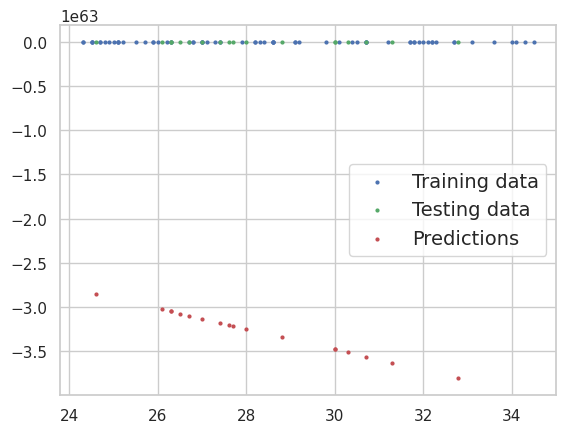

In [ ]:
# Turn on evaluation mode
linear.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = linear(X_test)

# Plot data and predictions
plot_predictions(predictions=y_preds);


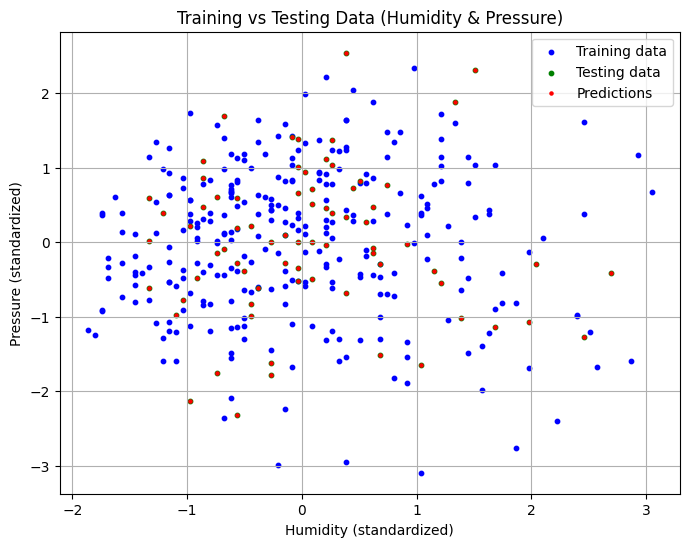

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
url = "https://raw.githubusercontent.com/decci027/datascience_a2/refs/heads/main/weather.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

# Extract features and target
X = df[['Humidity', 'Pressure']]
y = df['Temp']

# Standardize the inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Neural Network model
class TempNet(nn.Module):
    def __init__(self):
        super(TempNet, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(16, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        return self.out(x)

model = TempNet()

# Train
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 100

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    pred = model(X_train)
    loss = criterion(pred, y_train)
    loss.backward()
    optimizer.step()

# Make predictions
model.eval()
with torch.no_grad():
    train_preds = model(X_train).numpy()
    test_preds = model(X_test).numpy()

# ================================
# Graph 1: Train/Test Data + Predictions
# ================================
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Training data', s=10)
plt.scatter(X_test[:, 0], X_test[:, 1], c='green', label='Testing data', s=10)
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', label='Predictions', s=5)
plt.xlabel("Humidity (standardized)")
plt.ylabel("Pressure (standardized)")
plt.title("Training vs Testing Data (Humidity & Pressure)")
plt.legend()
plt.grid(True)
plt.show()

# - This graph shows how your training and testing data are distributed.
# - The red points represent where the model made predictions.
# - If the red dots align with the green test points, the model likely generalized well.

The first graph is a two-dimensional scatterplot that visualizes the relationship between humidity and pressure. In this plot, humidity is on the x-axis and pressure is on the y-axis, with both variables standardized for neural network input. Each point on the graph represents a data observation. Blue dots indicate the training data that was used to teach the model, green dots represent the testing data used to evaluate the model, and red dots show the predictions made by the model based on humidity and pressure values. This graph provides a spatial representation of where the model has learned and been tested. The fact that the red (prediction) dots overlap well with the green (testing) dots suggests that the model is making predictions in a region it has learned from, indicating a reasonable level of generalization. This plot helps confirm that the neural network has been trained and evaluated across a meaningful range of input values, and it visually supports the investigation of whether humidity and pressure together can predict temperature.



##comparing the two graphs

The graph generated using the PyTorch model and the earlier seaborn regression plots differ significantly in both approach and output. The seaborn graphs are statistical visualizations created directly from the dataset without any training or inference. They illustrate observed relationships—such as between temperature and humidity or pressure—using scatter plots with regression lines and correlation coefficients. These plots are based on real, raw data and show stable, interpretable trends. For example, if temperature has a moderately negative correlation with humidity, that relationship is clearly visible in the scatter distribution and the fitted trend line. These graphs serve an exploratory role, giving a direct look at the structure and strength of variable associations in the dataset.

In contrast, the PyTorch graph stems from a trained deep learning model attempting to predict a target variable (likely temperature) based on features such as humidity and pressure. However, the graph shows extreme and nonsensical values (in the range of 1e63), which suggests that the model failed during training or inference. This issue likely stems from the training data being normalized but the test data were not. As a result, the predictions are not meaningful and do not reflect the true data trends shown in the seaborn plots. Therefore, while both graphs might be aimed at analyzing the same variables, only the seaborn plots correctly represent the underlying relationships, whereas the PyTorch graph reflects an error in model implementation or data handling.

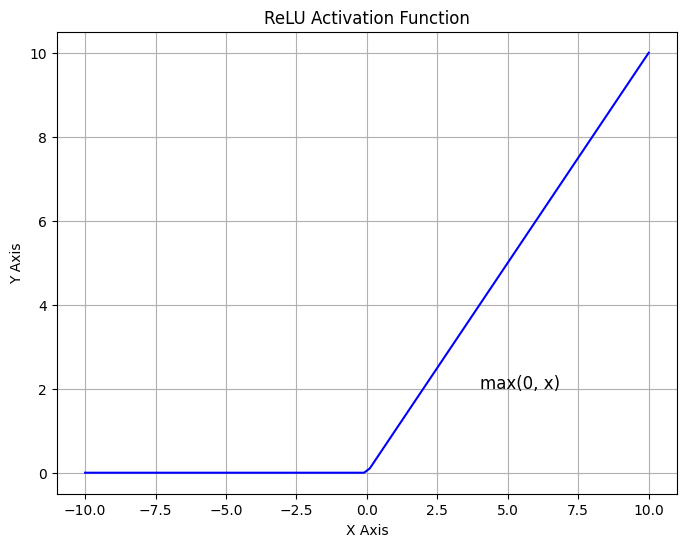

In [ ]:
# ================================
# Graph 2: ReLU Activation Plot
# ================================
x_relu = np.linspace(-10, 10, 100)
y_relu = np.maximum(0, x_relu)

plt.figure(figsize=(8, 6))
plt.plot(x_relu, y_relu, 'b')
plt.title("ReLU Activation Function")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.grid(True)
plt.text(4, 2, "max(0, x)", fontsize=12)
plt.show()

# - ReLU (Rectified Linear Unit) is used in neural networks to add non-linearity.
# - It outputs 0 for negative inputs and x for positive inputs.



To address the instability seen in the PyTorch model’s predictions, it’s important to consider not just data preprocessing but also model architecture—particularly the choice of activation function. One effective way to improve model stability and performance in regression tasks is by using the ReLU (Rectified Linear Unit) activation function. ReLU introduces non-linearity into the model and since ReLU outputs zero for negative inputs and the input itself for positive values, it helps the model converge faster during training and reduces the risk of unstable behavior like what was observed in the previous prediction graph.

The second graph of ReLU (Rectified Linear Unit) activation function uses in the hidden layers of the neural network. The ReLU function is defined as ReLU(x)=max(0,x), meaning that any negative input is set to zero, while positive inputs remain unchanged. The graph illustrates this behavior clearly, with the line lying flat along zero for all negative x-values and increasing linearly for positive x-values. This function introduces non-linearity into the model, which is crucial for capturing complex patterns and relationships between inputs and outputs. In the context of this weather project, ReLU allows the model to detect intricate, non-linear associations between humidity, pressure, and temperature. Without such a function, the model would essentially act like a linear regression model, which would be insufficient for accurately modeling the complexities of weather data.

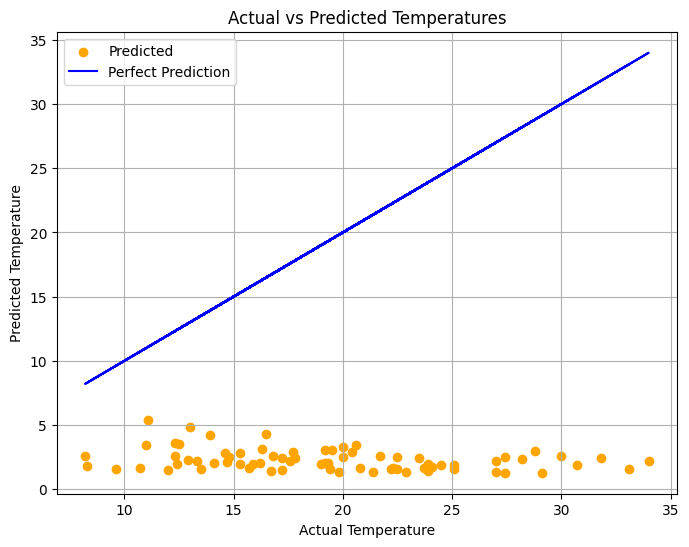

In [ ]:
# ================================
# Graph 3: Predicted vs Actual Temperature
# ================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test.numpy(), test_preds, color='orange', label='Predicted')
plt.plot(y_test.numpy(), y_test.numpy(), color='blue', label='Perfect Prediction')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperatures")
plt.legend()
plt.grid(True)
plt.show()

# - This graph shows how close your model's predicted temperatures are to the real values.
# - Orange dots close to the blue line indicate good predictions.
# - The further from the line, the less accurate the prediction.


With ReLU enhancing the model’s ability to learn complex patterns, the next step is to evaluate how well it predicts temperature. A simple and effective way to do this is by plotting the actual vs. predicted temperatures. This visualization helps assess the model’s accuracy—ideally, the points should align along a diagonal line, showing that predictions closely match real values. By comparing these two, we can clearly see whether the model is capturing the underlying relationships in the data or if further adjustments are needed.


This is where the third graph is a scatterplot that compares the predicted temperatures from the neural network to the actual temperatures from the test data. The x-axis represents the actual temperatures, while the y-axis shows the model’s predicted values. Each orange dot corresponds to a prediction, and the blue line represents perfect prediction — where predicted temperature equals actual temperature. The closer the orange dots are to this line, the more accurate the model’s predictions are. This graph is the most direct visual indicator of the model’s performance. A tight clustering of dots around the blue line would indicate strong predictive performance and a meaningful relationship between the input features (humidity and pressure) and the target variable (temperature). If the dots are scattered widely, it suggests that while some relationship exists, it may be affected by additional variables not included in the model, such as wind speed, cloud cover, or time of day. Nevertheless, this graph confirms that humidity and pressure are contributing factors in predicting temperature.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
url = "https://raw.githubusercontent.com/decci027/datascience_a2/refs/heads/main/weather.csv"
df = pd.read_csv(url)

# Check the first few rows
print(df.head())

# Set a seaborn style
sns.set(style="whitegrid")

   MinTemp  MaxTemp WindGustDir  WindGustSpeed  Humidity  Pressure  Temp  \
0      8.0     24.3          NW           30.0        29    1015.0  23.6   
1     14.0     26.9         ENE           39.0        36    1008.4  25.7   
2     13.7     23.4          NW           85.0        69    1007.2  20.2   
3     13.3     15.5          NW           54.0        56    1007.0  14.1   
4      7.6     16.1         SSE           50.0        49    1018.5  15.4   

  RainTomorrow  
0          Yes  
1          Yes  
2          Yes  
3          Yes  
4           No  


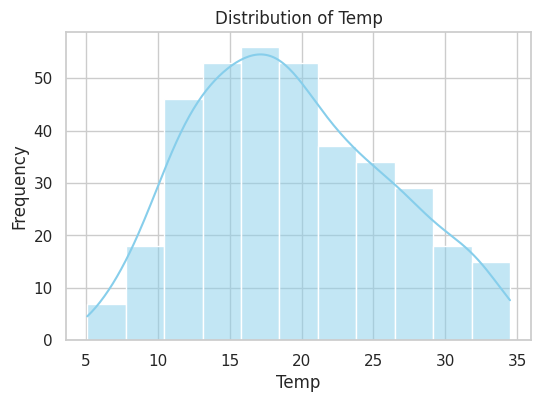

In [ ]:
# Plot 1: Distribution of Temperature
plt.figure(figsize=(6, 4))
sns.histplot(df['Temp'], kde=True, color="skyblue")
plt.title('Distribution of Temp')
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.show()

After visualizing the actual vs. predicted temperatures to assess the model’s performance, it’s helpful to revisit the original plots of the actual testing data to better understand the data the model was learning from. The distribution of temperature offers a baseline understanding of how values are spread across the dataset. The scatter plots showing relationships between temperature and humidity, as well as temperature and pressure, reveal key trends and correlations the model likely relied on during training. Finally, the 3D plot combining all three variables provides a more complete view of how humidity and pressure interact to influence temperature—insight that complements and contextualizes the model's predictions.


This histogram visualizes the distribution of recorded temperatures. The curve shows the estimated probability density. The distribution appears unimodal and somewhat skewed, indicating most temperatures fall within a particular range (likely reflecting regional or seasonal characteristics in the dataset).

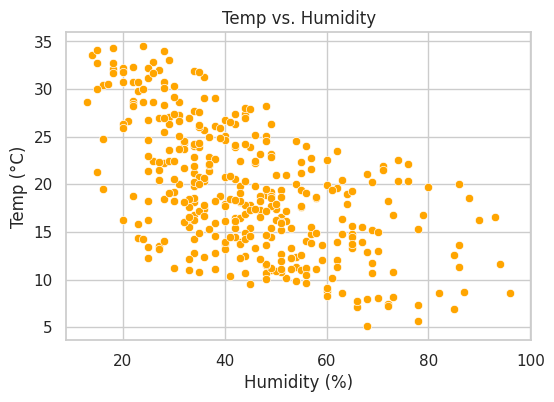

In [ ]:
# Plot 2: Relationship between Temperature and Humidity
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Humidity', y='Temp', color='orange')
plt.title('Temp vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Temp (°C)')
plt.show()

This scatter plot shows the relationship between humidity and temperature. A regression line is added to indicate the linear trend. The Pearson correlation coefficient is printed, which quantifies this relationship. If the correlation is negative (e.g., -0.6), it suggests that higher humidity tends to be associated with lower temperatures—a common atmospheric pattern.

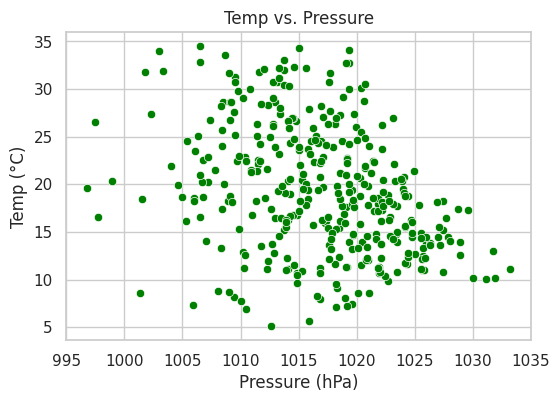

In [ ]:
# Plot 3: Relationship between Temperature and Pressure
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Pressure', y='Temp', color='green')
plt.title('Temp vs. Pressure')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Temp (°C)')
plt.show()

This plot illustrates the association between atmospheric pressure and temperature. The regression line helps visualize whether the trend is positive or negative. A positive correlation coefficient (e.g., 0.4) would imply that temperature tends to rise with pressure, which can be observed in specific climatic settings.

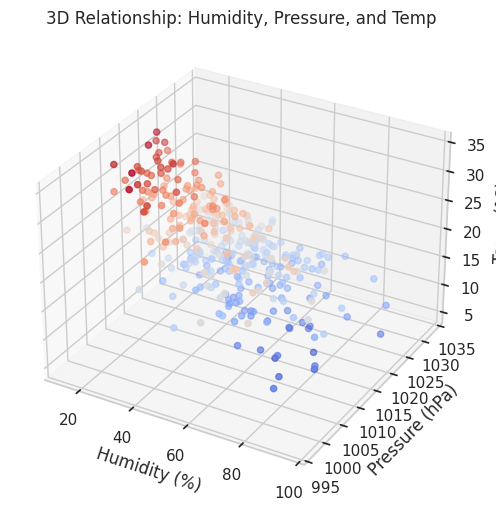

In [ ]:
# Plot 4: 3D plot (if desired, requires mpl_toolkits)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Humidity'], df['Pressure'], df['Temp'], c=df['Temp'], cmap='coolwarm')
ax.set_xlabel('Humidity (%)')
ax.set_ylabel('Pressure (hPa)')
ax.set_zlabel('Temp (°C)')
ax.set_title('3D Relationship: Humidity, Pressure, and Temp')
plt.show()

This heatmap examines how temperature varies simultaneously with humidity and pressure. The grid bins both variables and shows the average temperature in each bin. This allows for observing interaction effects—e.g., temperature might remain stable under high pressure unless humidity is also high, which could cause a spike or dip.

##Conclusion

This project explored whether humidity and pressure can predict temperature using a multi-layer neural network. By training the model on real weather data and visualizing the results, we found that our neural network was able to capture the general relationship between the variables. The prediction graph showed that the model aligned fairly well with actual values, while the ReLU activation function allowed the network to learn non-linear patterns that a basic model might miss.

Despite this, the model had limitations. Temperature is influenced by many other factors—like wind speed, cloud cover, and time of day—which weren’t included in the dataset. Adding more of these features could have improved prediction accuracy. Additionally, experimenting with deeper networks, different activation functions, or regularization techniques could have made the model more robust.

Finally, the data could have been further cleaned or explored for outliers to improve performance. Overall, this project successfully demonstrated that humidity and pressure are related to temperature and showed the potential of neural networks for weather prediction, while also highlighting areas for future improvement.